In [1]:
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
%matplotlib inline

In [29]:
def prob_to_angle(prob):
    return 2 * math.asin(math.sqrt(prob))

In [81]:
dist = {
    '0000': 0.00835,
    '0001': 0.00835,
    '0010': 0.00835,
    '0011': 0.04533,
    '0100': 0.04533,
    '0101': 0.04533,
    '0110': 0.22733,
    '0111': 0.22733,
    '1000': 0.22733,
    '1001': 0.04533,
    '1010': 0.04533,
    '1011': 0.04533,
    '1100': 0.00652 - 0.001275,
    '1101': 0.00652 - 0.001275,
    '1110': 0.00652 - 0.001275,
    '1111': 0.00652 - 0.001275
}
qc = QuantumCircuit(4)
initial_state = list(map(lambda x: math.sqrt(x), dist.values()))
qc.initialize(initial_state)

sim = Aer.get_backend('aer_simulator')
results = sim.run(qc, shots=10000000).result()
counts = results.get_counts()

#qc.draw(output='mpl')
plt.bar([int(x,2) for x in counts.keys()], counts.values())
plt.show()
counts
#qc.measure_all()
#qc.draw(output='mpl')

QiskitError: 'No counts for experiment "0"'

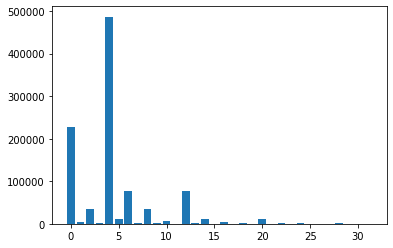

{'01101': 1741,
 '00100': 486835,
 '00110': 76958,
 '01000': 35529,
 '00000': 227423,
 '00010': 35583,
 '01110': 11928,
 '01100': 76471,
 '10100': 11067,
 '00101': 10874,
 '01010': 5600,
 '00111': 1755,
 '00001': 5141,
 '10000': 5266,
 '10110': 1734,
 '10010': 816,
 '01111': 273,
 '11100': 1633,
 '00011': 792,
 '01001': 798,
 '10101': 252,
 '11000': 773,
 '01011': 104,
 '11110': 302,
 '10001': 121,
 '10011': 19,
 '11010': 110,
 '10111': 33,
 '11111': 6,
 '11001': 18,
 '11101': 39,
 '11011': 6}

In [31]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=1000000).result()
counts = result.get_counts()
plt.bar([int(x, 2) for x in counts.keys()], counts.values())
plt.show()
counts

In [62]:
dist = {
    '000': 0.04, # 0
    '001': 0.06, # 1
    '010': 0.07, # 2
    '011': 0.52, # 3
    '100': 0.09, # 4
    '101': 0.03, # 5
    '110': 0.08, # 6
    '111': 0.11, # 7
}

## De aici incercam cu metoda din NormalDistribution

In [2]:
x = np.linspace(-5, 5, num=2**8)
probabilities = multivariate_normal.pdf(x, 1, 1)
normalized_probabilities = probabilities / np.sum(probabilities)

circuit = QuantumCircuit(8)
initialize = Initialize(np.sqrt(normalized_probabilities))
distribution = initialize.gates_to_uncompute().inverse()
circuit.compose(distribution, inplace=True)

for i in range (0, circuit.depth()):
    circuit = circuit.decompose()

circuit.draw()

'''
sim = Aer.get_backend("aer_simulator")
result = sim.run(circuit, shots=100000, memory=True).result()
counts = result.get_counts()
'''

'\nsim = Aer.get_backend("aer_simulator")\nresult = sim.run(circuit, shots=100000, memory=True).result()\ncounts = result.get_counts()\n'

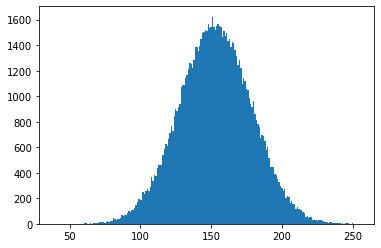

In [18]:
x = np.linspace(-5, 5, num=2**8)
probabilities = multivariate_normal.pdf(x, 1, 1)
normalized_probabilities = probabilities / np.sum(probabilities)

circuit = QuantumCircuit(8)
initialize = Initialize(np.sqrt(normalized_probabilities))
distribution = initialize.gates_to_uncompute().inverse()
circuit.compose(distribution, inplace=True)

for i in range (0, circuit.depth()**2):
    circuit = circuit.decompose()

circuit.measure_all()
sim = Aer.get_backend("aer_simulator")
result = sim.run(circuit, shots=100000, memory=True).result()
counts = result.get_counts()

plt.bar([int(x, 2) for x in counts.keys()], counts.values(), width=1)
plt.show()